In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import rc
from scipy.stats import chi2

In [34]:
def SetStyle(ax,x,y,xlabel_,ylabel_,scale_=1., fontsize_=16):
    
    ticks_x = ticker.FuncFormatter(lambda x,pos:'{:.2f}'.format(x/scale_))
    ax.xaxis.set_major_formatter(ticks_x)

    ticks_y = ticker.FuncFormatter(lambda y,pos:'{:.2f}'.format(y/scale_))
    ax.yaxis.set_major_formatter(ticks_y)

    ax.tick_params(axis='both', which='major', labelsize=12)

    ax.set_xlim(mu[0],mu[-1])
    #ax.set_ylim(np.min(y),np.max(y))
    ax.set_ylim(np.min(Q1)-1,np.max(Q1)+1)
    
    ax.set_xlabel(r'$'+xlabel_+'$',fontsize=fontsize_)
    ax.xaxis.set_label_coords(0.96, -0.1)

    if ylabel_ == '':
        ax.set_ylabel('',fontsize=fontsize_)
    else:    
        ax.set_ylabel(r'$'+ylabel_+'$',fontsize=fontsize_)
            
    ax.yaxis.set_label_coords(-0.1, 0.96)

    ax.legend(loc=1,prop={'size': 10})  

In [130]:
def GetFigure(name_=''):
    
    fig = plt.figure(figsize=(6,6),dpi=100)
    ax = fig.add_subplot(1,1,1)
        
   
    ax.plot(mu,Q1,linestyle='--',lw=2,label=r'Log-likelihood ratio')
    
    ax.axhline(y = minQ1, color='r', linestyle='--', lw=1)
        

    SetStyle(ax,b,b,xlabel_='\mu',ylabel_='\mathcal{Q}(\mu)')
    
    folder = '../Figures/'
    folder += name_
    
    plt.savefig(folder)

In [131]:
mu = np.linspace(0.,3.,1000)
s = 10
n = 105
b = 100
Q = lambda mu: 2*(mu*s - n*np.log(1+mu*s/b))

In [132]:
Q1 = Q(mu)

In [133]:
minQ1 = np.min(Q1)
ii = np.where(Q1 == np.amin(Q1))
print(ii)

(array([167]),)


In [134]:
muhat = mu[ii]
print(muhat)

[0.5015015]


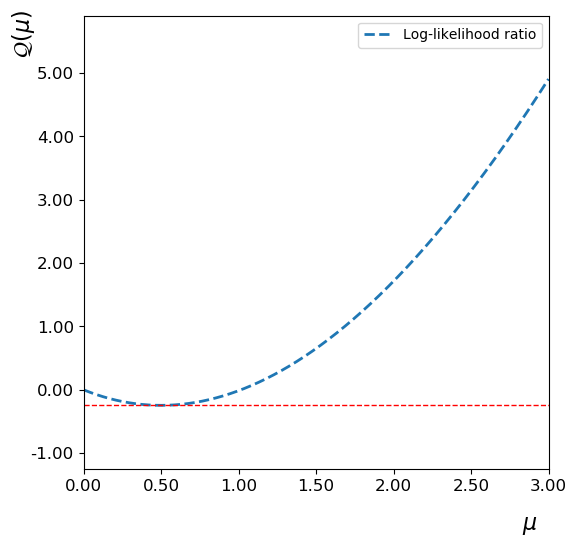

In [135]:
GetFigure(name_='LnQplot.pdf')